In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from scipy.io import loadmat
import pathlib
import fem
project_path = pathlib.Path(fem.__file__).parents[1]
# mat = loadmat(project_path / 'loads' / 'test_load_full_extent.mat')
mat = loadmat(project_path / 'loads' / 'f2dout.mat')
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'FIELD_PARAMS', 'intensity'])


In [4]:
mpn = mat['FIELD_PARAMS']['measurementPoints'][0,0]
extent = dict(
    lat=np.unique(mpn[:,0]),
    ele=np.unique(mpn[:,1]),
    ax=np.unique(mpn[:,2]),
)

nlat, nele, nax = len(extent['lat']), len(extent['ele']), len(extent['ax'])
intensity = mat['intensity'].reshape(nax, nlat, nele)
# print(extent)

{'lat': array([-0.02  , -0.0198, -0.0196, -0.0194, -0.0192, -0.019 , -0.0188,
       -0.0186, -0.0184, -0.0182, -0.018 , -0.0178, -0.0176, -0.0174,
       -0.0172, -0.017 , -0.0168, -0.0166, -0.0164, -0.0162, -0.016 ,
       -0.0158, -0.0156, -0.0154, -0.0152, -0.015 , -0.0148, -0.0146,
       -0.0144, -0.0142, -0.014 , -0.0138, -0.0136, -0.0134, -0.0132,
       -0.013 , -0.0128, -0.0126, -0.0124, -0.0122, -0.012 , -0.0118,
       -0.0116, -0.0114, -0.0112, -0.011 , -0.0108, -0.0106, -0.0104,
       -0.0102, -0.01  , -0.0098, -0.0096, -0.0094, -0.0092, -0.009 ,
       -0.0088, -0.0086, -0.0084, -0.0082, -0.008 , -0.0078, -0.0076,
       -0.0074, -0.0072, -0.007 , -0.0068, -0.0066, -0.0064, -0.0062,
       -0.006 , -0.0058, -0.0056, -0.0054, -0.0052, -0.005 , -0.0048,
       -0.0046, -0.0044, -0.0042, -0.004 , -0.0038, -0.0036, -0.0034,
       -0.0032, -0.003 , -0.0028, -0.0026, -0.0024, -0.0022, -0.002 ,
       -0.0018, -0.0016, -0.0014, -0.0012, -0.001 , -0.0008, -0.0006,
       -0.00

In [11]:
np.where(np.isclose(extent['lat'], 0))[0][0]

8

TypeError: 'norm' must be an instance of matplotlib.colors.Normalize, str or None, not a numpy.ndarray

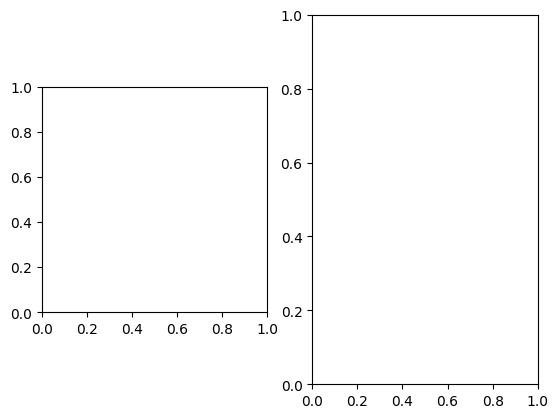

In [5]:
lat_zero_idx = np.where(np.isclose(extent['lat'], 0))[0][0]
ele_zero_idx = np.where(np.isclose(extent['ele'], 0))[0][0]

fig, ax = plt.subplots(nrows=1,ncols=2)
ax[0].imshow(intensity[:,lat_zero_idx,:])
ax[0].set(xlabel='Elevational', ylabel='Axial')
ax[1].imshow(intensity[:,:,ele_zero_idx])
ax[1].set(xlabel='Lateral', ylabel='Axial')